# FFT Analysis of Rainfall Data Over High and Low Land Regions

## 1. Importing Packages and Data

In [53]:
from netCDF4 import Dataset
import numpy as np
import xarray as xr
#from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from pythia_datasets import DATASETS
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
#pip install import-ipynb


## 2. Importing the Previous Notebook

In [54]:
import import_ipynb
import L1_prepocessing_data

file1 = xr.open_dataset('/Users/spv2023/MGWR_datasets/inputs/etopo1_MC.nc')

#import pickle
# Load variables
#with open('mean_rainfall_data.pkl', 'rb') as f:
#    high_rain_lat_avg, high_rain_lon_avg, low_rain_lat_avg,low_rain_lon_avg = pickle.load(f)

/Users/spv2023/Downloads/conda/envs/myenv/lib/python3.11/site-packages/xarray/coding/times.py:240: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)
/Users/spv2023/Downloads/conda/envs/myenv/lib/python3.11/site-packages/xarray/coding/times.py:987: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/spv2023/Downloads/conda/envs/myenv/lib/python3.11/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)


## 3. Calculating FFT for High Land Rainfall (Latitude and Longitude Averages)
### 3.1 FFT of High Land Rainfall - Latitude Average

In [55]:
# Considering the high_rain_lat_avg as a 2D array (time, longitude)
fft_results = []
lon_ind = []

# Loop over each longitude index
for lon_index in range(high_rain_lat_avg.shape[1]):
    data = pd.DataFrame(high_rain_lat_avg[:, lon_index])
    # Step 1: Remove the mean (detrend the data)
    data_detrended = data - np.mean(data)
    
    # Step 2: Apply rolling mean to detrended data
    df = pd.DataFrame(data_detrended).rolling(window=3).mean()
    df_clean = df.dropna()

    if df_clean.empty:
        #print(f"Data for longitude index {lon_index} is empty after rolling mean.")
        # Append NaN array of appropriate length to fft_results
        #fft_results.append(np.nan )  # Append a NaN
        continue

    fft_result = np.fft.fft(df_clean)
    n = df_clean.size
    frequencies = np.fft.fftfreq(n, d=1)

    positive_frequencies = frequencies[:n // 2]
    magnitude = np.abs(fft_result)[:n // 2]
    periods = 1 / positive_frequencies
    lon_ind += [lon_index]
    # Store results for this longitude
    fft_results.append(magnitude)

# Convert the list of magnitudes into a 2D array (longitude, period)
fft_magnitude_array = np.array(fft_results)
fft_magnitude_array = np.squeeze(fft_magnitude_array)
# Prepare periods for contour plot (assuming they are the same for all longitudes)
# Create a meshgrid for periods and longitudes
longitudes = low_rain_lat_avg.coords['lon'].values 
#periods = 1 / np.fft.fftfreq(df_clean.size, d=1)[:n // 2]

curr_lons = longitudes[lon_ind]
curr_lons.shape
fft_magnitude_array.shape

darray = xr.DataArray(data=fft_magnitude_array[:,1:],
                      dims=['lon','periods'],
                      coords={'lon':curr_lons,'periods':periods[1:]})


FFT_high_rain_lat_avg = darray.reindex(lon=longitudes)


/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_76017/2723801732.py:27: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_76017/2723801732.py:27: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_76017/2723801732.py:27: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_76017/2723801732.py:27: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_76017/2723801732.py:27: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_76017/2723801732.py:27: RuntimeWarning: divide by zero encountered in divide

### 3.2 FFT of High Land Rainfall - Longitude Average

In [56]:
# Considering the high_rain_lon_avg as a 2D array (time, latitude)
fft_results = []
lat_ind = []

# Loop over each longitude index
for lat_index in range(high_rain_lon_avg.shape[1]):
    data = pd.DataFrame(high_rain_lon_avg[:, lat_index])
    # Step 1: Remove the mean (detrend the data)
    data_detrended = data - np.mean(data)
    
    # Step 2: Apply rolling mean to detrended data
    df = pd.DataFrame(data_detrended).rolling(window=3).mean()
    df_clean = df.dropna()

    if df_clean.empty:
        #print(f"Data for longitude index {lon_index} is empty after rolling mean.")
        # Append NaN array of appropriate length to fft_results
        #fft_results.append(np.nan )  # Append a NaN
        continue

    fft_result = np.fft.fft(df_clean)
    n = df_clean.size
    frequencies = np.fft.fftfreq(n, d=1)

    positive_frequencies = frequencies[:n // 2]
    magnitude = np.abs(fft_result)[:n // 2]
    periods = 1 / positive_frequencies
    lat_ind += [lat_index]
    # Store results for this longitude
    fft_results.append(magnitude)

# Convert the list of magnitudes into a 2D array (longitude, period)
fft_magnitude_array = np.array(fft_results)
fft_magnitude_array = np.squeeze(fft_magnitude_array)
# Prepare periods for contour plot (assuming they are the same for all longitudes)
# Create a meshgrid for periods and longitudes
latitudes = high_rain_lon_avg.coords['lat'].values 
#periods = 1 / np.fft.fftfreq(df_clean.size, d=1)[:n // 2]

curr_lats = latitudes[lat_ind]
curr_lats.shape
fft_magnitude_array.shape
periods.shape

darray = xr.DataArray(data=fft_magnitude_array[:,1:],
                      dims=['lat','periods'],
                      coords={'lat':curr_lats,'periods':periods[1:]})


FFT_high_rain_lon_avg = darray.reindex(lat=latitudes)

/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_76017/3942859841.py:27: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_76017/3942859841.py:27: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_76017/3942859841.py:27: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_76017/3942859841.py:27: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_76017/3942859841.py:27: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_76017/3942859841.py:27: RuntimeWarning: divide by zero encountered in divide

## 4. Calculating FFT for Low Land Rainfall (Latitude and Longitude Averages)
### 4.1 FFT of Low Land Rainfall - Latitude Average

In [57]:
# Considering the low_rain_lat_avg as a 2D array (time, longitude)
fft_results = []
lon_ind = []

# Loop over each longitude index
for lon_index in range(low_rain_lat_avg.shape[1]):
    
    data = pd.DataFrame(low_rain_lat_avg[:, lon_index])
    # Step 1: Remove the mean (detrend the data)
    data_detrended = data - np.mean(data)
    
    # Step 2: Apply rolling mean to detrended data
    df = pd.DataFrame(data_detrended).rolling(window=3).mean()
    df_clean = df.dropna()
    
    if df_clean.empty:
        #print(f"Data for longitude index {lon_index} is empty after rolling mean.")
        # Append NaN array of appropriate length to fft_results
        #fft_results.append(np.nan )  # Append a NaN
        continue

    fft_result = np.fft.fft(df_clean)
    n = df_clean.size
    frequencies = np.fft.fftfreq(n, d=1)

    positive_frequencies = frequencies[:n // 2]
    magnitude = np.abs(fft_result)[:n // 2]
    periods = 1 / positive_frequencies
    lon_ind += [lon_index]
    # Store results for this longitude
    fft_results.append(magnitude)

# Convert the list of magnitudes into a 2D array (longitude, period)
fft_magnitude_array = np.array(fft_results)
fft_magnitude_array = np.squeeze(fft_magnitude_array)
# Prepare periods for contour plot (assuming they are the same for all longitudes)
# Create a meshgrid for periods and longitudes
longitudes = low_rain_lat_avg.coords['lon'].values 
#periods = 1 / np.fft.fftfreq(df_clean.size, d=1)[:n // 2]

curr_lons = longitudes[lon_ind]
curr_lons.shape
fft_magnitude_array.shape


darray = xr.DataArray(data=fft_magnitude_array[:,1:],
                      dims=['lon','periods'],
                      coords={'lon':curr_lons,'periods':periods[1:]})


FFT_low_rain_lat_avg = darray.reindex(lon=longitudes)

/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_76017/1076119507.py:28: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_76017/1076119507.py:28: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_76017/1076119507.py:28: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_76017/1076119507.py:28: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_76017/1076119507.py:28: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_76017/1076119507.py:28: RuntimeWarning: divide by zero encountered in divide

### 4.2 FFT of Low Land Rainfall - Longitude Average

In [58]:
# Assuming low_rain_lon_avg is a 2D array (time, latitude)
fft_results = []
lat_ind = []

# Loop over each longitude index
for lat_index in range(low_rain_lon_avg.shape[1]):
        
    data = pd.DataFrame(low_rain_lon_avg[:, lat_index])
    # Step 1: Remove the mean (detrend the data)
    data_detrended = data - np.mean(data)
    
    # Step 2: Apply rolling mean to detrended data
    df = pd.DataFrame(data_detrended).rolling(window=3).mean()
    df_clean = df.dropna()
    
    if df_clean.empty:
        #print(f"Data for longitude index {lon_index} is empty after rolling mean.")
        # Append NaN array of appropriate length to fft_results
        #fft_results.append(np.nan )  # Append a NaN
        continue

    fft_result = np.fft.fft(df_clean)
    n = df_clean.size
    frequencies = np.fft.fftfreq(n, d=1)

    positive_frequencies = frequencies[:n // 2]
    magnitude = np.abs(fft_result)[:n // 2]
    periods = 1 / positive_frequencies
    lat_ind += [lat_index]
    # Store results for this longitude
    fft_results.append(magnitude)

# Convert the list of magnitudes into a 2D array (longitude, period)
fft_magnitude_array = np.array(fft_results)
fft_magnitude_array = np.squeeze(fft_magnitude_array)
# Prepare periods for contour plot (assuming they are the same for all longitudes)
# Create a meshgrid for periods and longitudes
latitudes = low_rain_lon_avg.coords['lat'].values 
#periods = 1 / np.fft.fftfreq(df_clean.size, d=1)[:n // 2]

curr_lats = latitudes[lat_ind]
curr_lats.shape
fft_magnitude_array.shape
periods.shape

darray = xr.DataArray(data=fft_magnitude_array[:,1:],
                      dims=['lat','periods'],
                      coords={'lat':curr_lats,'periods':periods[1:]})


FFT_low_rain_lon_avg = darray.reindex(lat=latitudes)

/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_76017/3889203581.py:28: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_76017/3889203581.py:28: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_76017/3889203581.py:28: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_76017/3889203581.py:28: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_76017/3889203581.py:28: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_76017/3889203581.py:28: RuntimeWarning: divide by zero encountered in divide

## 5. Plotting the FFT Results

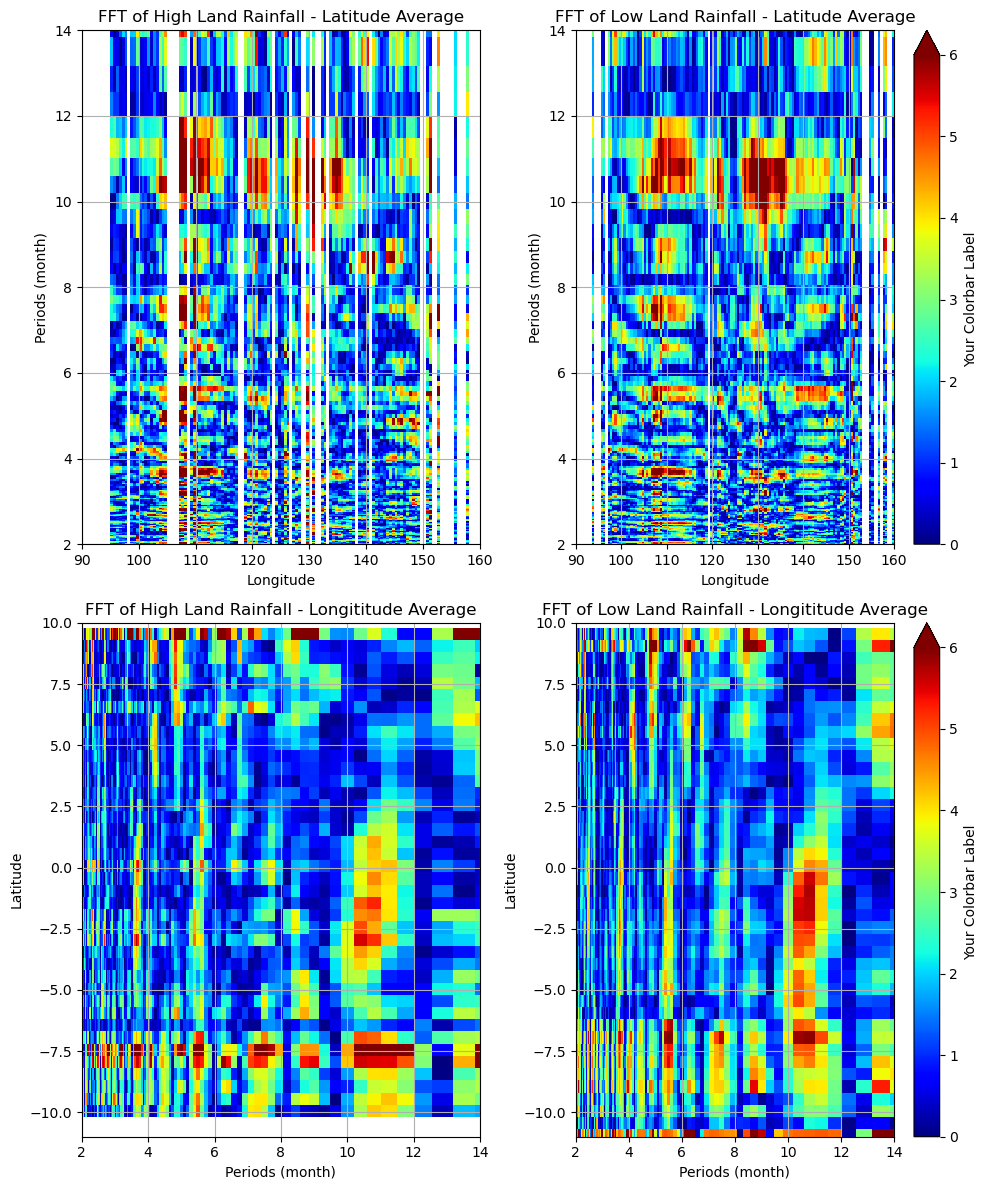

In [60]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 12))

# Plot the first DataArray
FFT_high_rain_lat_avg.plot(ax=axes[0, 0], x='lon', y='periods', cmap='jet', robust=True,
              vmin=0, vmax=6, add_colorbar=False)
axes[0, 0].set_title('FFT of High Land Rainfall - Latitude Average')
axes[0, 0].set_ylabel('Periods (month)')
axes[0, 0].set_xlabel('Longitude')
axes[0, 0].grid()
# Set y-axis limits
axes[0, 0].set_ylim(2, 14)

# Plot the second DataArray
FFT_low_rain_lat_avg.plot(ax=axes[0,1],x='lon', y='periods', cmap='jet', robust=True,
              vmin=0, vmax=6, cbar_kwargs={'label': 'Your Colorbar Label'})
axes[0, 1].set_title('FFT of Low Land Rainfall - Latitude Average')
axes[0, 1].set_ylabel('Periods (month)')
axes[0, 1].set_xlabel('Longitude')
axes[0, 1].grid()
# Set y-axis limits
axes[0, 1].set_ylim(2, 14)

# Plot the third DataArray
FFT_high_rain_lon_avg.plot(ax=axes[1, 0], y='lat', x='periods', cmap='jet', robust=True,
              vmin=0, vmax=6, add_colorbar=False)
axes[1, 0].set_title('FFT of High Land Rainfall - Longititude Average')
axes[1, 0].set_ylabel('Latitude')
axes[1, 0].set_xlabel('Periods (month)')
axes[1, 0].grid()
# Set y-axis limits
axes[1, 0].set_ylim(-11, 10)
axes[1, 0].set_xlim(2, 14)

# Plot the fourth DataArray
FFT_low_rain_lon_avg.plot(ax=axes[1,1],y='lat', x='periods', cmap='jet', robust=True,
              vmin=0, vmax=6, cbar_kwargs={'label': 'Your Colorbar Label'})
axes[1, 1].set_title('FFT of Low Land Rainfall - Longititude Average')
axes[1, 1].set_ylabel('Latitude')
axes[1, 1].set_xlabel('Periods (month)')
axes[1, 1].grid()
# Set y-axis limits
axes[1, 1].set_ylim(-11, 10)
axes[1, 1].set_xlim(2, 14)



# Remove the duplicate axis on the right
# axes[1, 1].axis('off')  # Hide the second axis in the bottom row


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## 6. Calculating and Plotting the Difference in FFT Magnitude

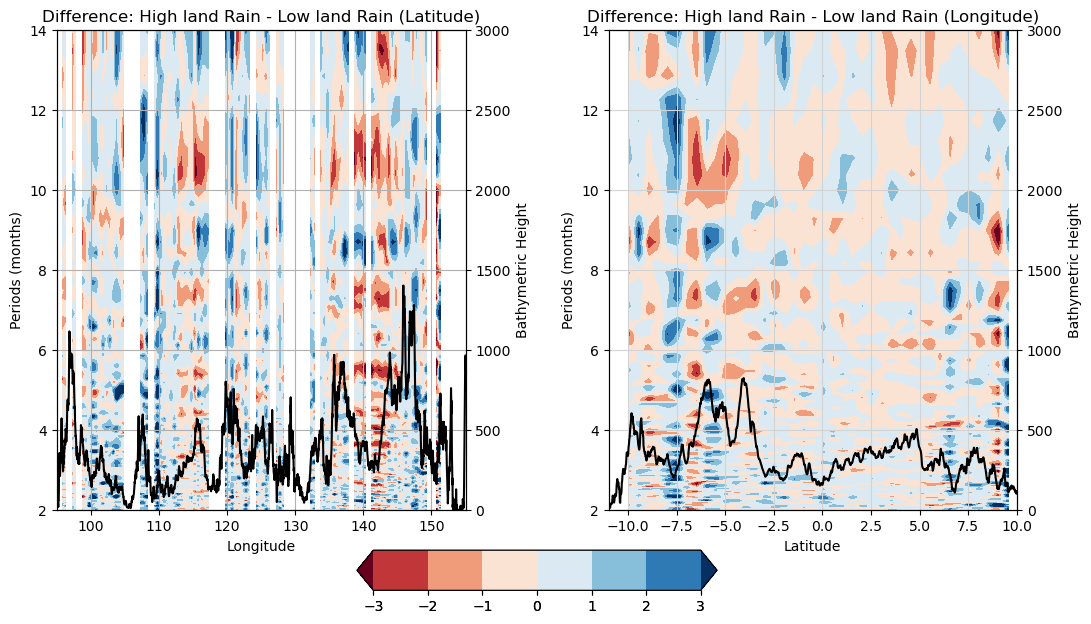

In [61]:
# Calculate the difference
diff_lat_avg  = FFT_high_rain_lat_avg - FFT_low_rain_lat_avg
diff_lon_avg  = FFT_high_rain_lon_avg - FFT_low_rain_lon_avg
# Load bathymetric data (assuming it's already loaded as file1.B_BATHY)
bathy_mc = file1.B_BATHY[0, :, :].sel(LON16201_20401=slice(left,right), LAT4201_6601=slice(bottom, top))

# Calculate the mean over longitude, considering only land (bathy >= 0)
bathy_lat = bathy_mc.where(bathy_mc >= 0).mean(dim='LAT4201_6601', skipna=True)
bathy_lon = bathy_mc.where(bathy_mc >= 0).mean(dim='LON16201_20401', skipna=True)

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Plot the latitude difference as a contour plot
contour_lat = diff_lat_avg.plot.contourf(ax=axes[0], x='lon', y='periods', cmap='RdBu', 
                                          vmin=-3, vmax=3, add_colorbar=False)
axes[0].set_title('Difference: High land Rain - Low land Rain (Latitude)')
axes[0].set_ylabel('Periods (months)')
axes[0].set_xlabel('Longitude')
axes[0].grid()
axes[0].set_ylim(2, 14)
axes[0].set_xlim(95, 155)
# Overlay bathymetric data on the latitude difference plot
#bathy_lat.plot.contour(ax=axes[0], levels=10, colors='black', linewidths=0.5, alpha=0.7)
# Overlay bathymetric data as a line plot on the latitude difference plot
#axes[0].plot(bathy_lat['LON16201_20401'], bathy_lat, color='black', linewidth=1.5, label='Bathymetry')
#axes[0].legend()
# Create a secondary y-axis for bathymetric data
ax2 = axes[0].twinx()

# Overlay bathymetric data as a line plot on the secondary y-axis
ax2.plot(bathy_lat['LON16201_20401'], bathy_lat, color='black', linewidth=1.5, label='Bathymetry')
ax2.set_ylabel('Bathymetric Height', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, 3000)


# Plot the longitude difference as a contour plot
# contour_lon = diff_lon_avg.plot.contourf(ax=axes[1], x='lat', y='periods', cmap='Spectral', 
#                                          vmin=-5, vmax=5, cbar_kwargs={'label': 'Your Colorbar Label'})
contour_lon = diff_lon_avg.plot.contourf(ax=axes[1], x='lat', y='periods', cmap='RdBu', 
                                          vmin=-3, vmax=3,add_colorbar=False )
axes[1].set_title('Difference: High land Rain - Low land Rain (Longitude)')
axes[1].set_xlabel('Latitude')
axes[1].set_ylabel('Periods (months)')
axes[1].grid(color='lightgray')
axes[1].set_xlim(-11, 10)
axes[1].set_ylim(2, 14)

# Create a secondary y-axis for bathymetric data
ax_2 = axes[1].twinx()

# Overlay bathymetric data as a line plot on the secondary y-axis
ax_2.plot(bathy_lon['LAT4201_6601'], bathy_lon, color='black', linewidth=1.5, label='Bathymetry (m)')
ax_2.set_ylabel('Bathymetric Height', color='black')
ax_2.tick_params(axis='y', labelcolor='black')
ax_2.set_ylim(0, 3000)

# Add a colorbar for the first subplot
#
#cbar.set_label('Difference')


#cbar = plt.colorbar(contour_lat, ax=axes[1], orientation='horizontal', pad=0.1)
#cbar.set_label('Difference')
# Show the plot
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.35, hspace=0.9)
cbar = plt.colorbar(contour_lat, orientation='horizontal', pad=0.1, shrink=0.7, aspect=9)
cbar.ax.set_position([0.35, -0.65, 0.3, 0.9])  # [left, bottom, width, height]
cbar = plt.colorbar(contour_lat, ax=axes[1], orientation='horizontal', pad=0.1, shrink=0., aspect=9)
cbar.ax.set_position([0.35, -0.65, 0.3, 0.9])  # [left, bottom, width, height]
plt.show()
